In [1]:
from cpymad.madx import Madx
madx = Madx()
from matplotlib import pyplot as plt


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.05.00  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2019.05.10               +
  + Execution date: 2019.06.09 15:18:36      +
  ++++++++++++++++++++++++++++++++++++++++++++


# Run the code

In [22]:
madx.option(echo=True)
madx.call(file='FODO_input.txt')

! General parameters

Lcell = 100;

++++++ info: lcell redefined


! Quadrupole Parameters

f=60;

++++++ info: f redefined
K1FL := 1/f;

++++++ info: k1fl redefined
K1DL := -K1FL;

++++++ info: k1dl redefined


! Quadrupole definition

QF: multipole, KNL:={0,K1FL};

++++++ info: element redefined: qf
QD: multipole, KNL:={0,K1DL};

++++++ info: element redefined: qd




! Sequence definition

FODO: SEQUENCE, REFER=center, L=100;

qf: QF, at=0;

qd: QD, at=50;

ENDSEQUENCE;



! Beam definition

beam, particle=proton, energy=1;

use, sequence=FODO;



/*************************************************/

!   TWISS

/*************************************************/



SELECT,FLAG=TWISS,column=name,s,betx,bety,alfx,alfy,mux,muy,x,px,y,py,dx,dpx,dy,dpy;

twiss,file="FODO_output_before_matching.txt";

enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  

# Twiss

In [23]:
myTwiss=madx.twiss(sequence='FODO')
myTwissDF=myTwiss.dframe()

enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.1666666665      -0.5313018308        173.2050808                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.1666666665 

               dq2            betymax              dymax              dyrms 
     -0.5313018308        173.2050808                 -0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            synch_3            synch_4            synch_5 
                 0                  0                  0                  0 

            nflips 
          

In [24]:
myTwissDF

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
#s,fodo$start:1,marker,0.0,173.205081,-1.732051,0.000000,57.735027,0.577350,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
qf,qf:1,multipole,0.0,173.205081,1.732051,0.000000,57.735027,-0.577350,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,50.0,57.735027,0.577350,0.083333,173.205081,-1.732051,0.083333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
qd,qd:1,multipole,50.0,57.735027,-0.577350,0.083333,173.205081,1.732051,0.083333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,100.0,173.205081,-1.732051,0.166667,57.735027,0.577350,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#e,fodo$end:1,marker,100.0,173.205081,-1.732051,0.166667,57.735027,0.577350,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Simple plot

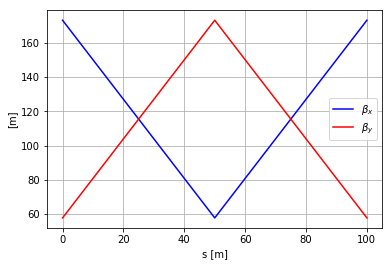

In [25]:
plt.plot(myTwissDF.s,myTwissDF.betx,'b',label='$\\beta_x$')
plt.plot(myTwissDF.s,myTwissDF.bety,'r',label='$\\beta_y$')
plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.grid()
plt.legend(loc='best')

# Survey

In [26]:
mySurvey=madx.survey(sequence='FODO')

In [27]:
mySurveyDF=mySurvey.dframe()

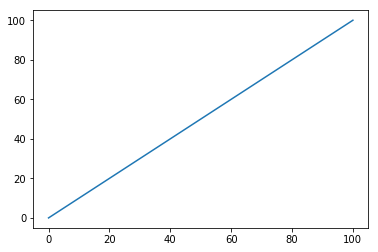

In [28]:
plt.plot(mySurveyDF['s'],mySurveyDF['z'])

### The input command

In [29]:
madx.input('''value lcell;
              value lcell;
              value lcell;
              value lcell;
              ''');

lcell              =                100 ;
lcell              =                100 ;
lcell              =                100 ;
lcell              =                100 ;


In [30]:
# globals
print(list(madx.globals))

['version', 'pi', 'twopi', 'degrad', 'raddeg', 'e', 'amu0', 'emass', 'mumass', 'nmass', 'pmass', 'clight', 'qelect', 'hbar', 'erad', 'prad', 'none', 'twiss_tol', 'lcell', 'f', 'k1fl', 'k1dl', 'tar', '__0__', '__1__', '__2__', '__3__', '__4__', '__5__']


In [31]:
print(list(madx.table))

['summ', 'twiss', 'embedded_twiss_table', 'survey', 'sectortable']


In [32]:
madx.table['summ'].dframe().transpose()

,#e
length,100.000000
orbit5,-0.000000
alfa,0.000000
gammatr,0.000000
q1,0.166667
dq1,-0.531302
betxmax,173.205081
dxmax,0.000000
dxrms,0.000000
xcomax,0.000000


In [33]:
print(list(madx.sequence))

['fodo']


In [34]:
a=madx.sequence.fodo

In [35]:
a.beam

beam, particle=proton, sequence=default_beam, bunched=true, radiate=false, mass=0.9382720813, charge=1.0, energy=1.0, pc=0.34589810848422725, gamma=1.065788932581767, beta=0.34589810848422725, brho=1.153791895872935, ex=1.0, exn=0.36865437582345684, ey=1.0, eyn=0.36865437582345684, et=0.001, sigt=1.0, sige=0.001, kbunch=1.0, npart=0.0, bcurrent=0.0, freq0=1.0369764416003715, circ=100.0, dtbyds=0.0, deltap=0.0, alfa=0.8803544985470338, u0=0.0, qs=0.0, arad=1.534698264921138e-18, bv=1.0, pdamp={1.0,1.0,2.0}, n1min=-1.0;

In [36]:
madx.sectormap(['fodo$start','fodo$end'])

enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.1666666665      -0.5313018308        173.2050808                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.1666666665 

               dq2            betymax              dymax              dyrms 
     -0.5313018308        173.2050808                 -0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            synch_3            synch_4            synch_5 
                 0                  0                  0                  0 

            nflips 
          

array([[[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00

In [45]:
import numpy as np
np.linalg.det(madx.sectortable()[0])-1

0.0

In [61]:
madx.sectortable()[1]

array([[-9.99999998e-01,  1.50000000e+02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.00000000e-02,  2.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         5.00000000e+01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.00000000e-02,
         7.28355598e-10,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  7.35802423e+02,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.0000000

In [60]:
np.linalg.det(madx.sectortable()[1][:5,:5])-1

6.661338147750939e-16

In [58]:
madx.sectortable()[1]

array([[-9.99999998e-01,  1.50000000e+02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.00000000e-02,  2.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         5.00000000e+01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.00000000e-02,
         7.28355598e-10,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  7.35802423e+02,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.0000000

In [62]:
madx.beam.keys()

KeysView(beam, particle=positron, bunched=true, radiate=false, mass=0.0005109989461, charge=1.0, energy=1.0, pc=0.0, gamma=0.0, beta=0.0, brho=0.0, ex=1.0, exn=0.0, ey=1.0, eyn=0.0, et=0.001, sigt=1.0, sige=0.001, kbunch=1.0, npart=1.0, bcurrent=0.0, freq0=0.0, circ=0.0, dtbyds=0.0, deltap=0.0, alfa=0.0, u0=0.0, qs=0.0, arad=0.0, bv=1.0, pdamp={1.0,1.0,2.0}, n1min=-1.0;)

In [63]:
madx.sequence.fodo.beam

beam, particle=proton, sequence=default_beam, bunched=true, radiate=false, mass=0.9382720813, charge=1.0, energy=1.0, pc=0.34589810848422725, gamma=1.065788932581767, beta=0.34589810848422725, brho=1.153791895872935, ex=1.0, exn=0.36865437582345684, ey=1.0, eyn=0.36865437582345684, et=0.001, sigt=1.0, sige=0.001, kbunch=1.0, npart=0.0, bcurrent=0.0, freq0=1.0369764416003715, circ=100.0, dtbyds=0.0, deltap=0.0, alfa=0.8803544985470338, u0=0.0, qs=0.0, arad=1.534698264921138e-18, bv=1.0, pdamp={1.0,1.0,2.0}, n1min=-1.0;

In [64]:
madx.sequence.fodo.twiss_table.dframe()

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
#s,fodo$start:1,marker,0.0,173.205081,-1.732051,0.000000,57.735027,0.577350,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
qf,qf:1,multipole,0.0,173.205081,1.732051,0.000000,57.735027,-0.577350,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,50.0,57.735027,0.577350,0.083333,173.205081,-1.732051,0.083333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
qd,qd:1,multipole,50.0,57.735027,-0.577350,0.083333,173.205081,1.732051,0.083333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,100.0,173.205081,-1.732051,0.166667,57.735027,0.577350,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#e,fodo$end:1,marker,100.0,173.205081,-1.732051,0.166667,57.735027,0.577350,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
madx.sequence.fodo.elements['qd']

qd: multipole, at=50.0, knl={0.0,-0.01999999998543289};